In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pickle




In [2]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1446,ham,Looks like u wil b getting a headstart im leav...,NaN,NaN,NaN
3133,ham,Ok going to sleep. Hope i can meet her.,NaN,NaN,NaN
2271,ham,Life spend with someone for a lifetime may be ...,NaN,NaN,NaN
620,ham,Dear we got &lt;#&gt; dollars hi hi,NaN,NaN,NaN
5220,ham,I have to take exam with in march 3,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

##DATA CLEANING


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True ,errors='ignore')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.sample(5)

,v1,v2
3635,ham,\ME 2 BABE I FEEL THE SAME LETS JUST 4GET ABOU...
442,ham,Oic... I saw him too but i tot he din c me... ...
4909,ham,WE REGRET TO INFORM U THAT THE NHS HAS MADE A ...
5217,ham,Well thats nice. Too bad i cant eat it
1168,ham,Ok . . now i am in bus. . If i come soon i wil...


In [9]:
df.rename(columns={'v1':'Goal','v2':'content'},inplace=True)

In [10]:
df['Goal']=encoder.fit_transform(df['Goal'])

In [11]:
df.head()

,Goal,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# **EDA**

In [16]:
df['Goal'].value_counts()

,count
Goal,
0,4516
1,653


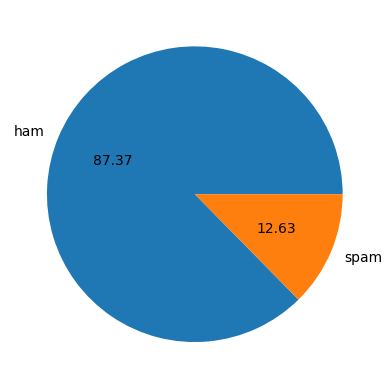

In [17]:
plt.pie(df['Goal'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)


In [20]:
df['num_characters']=df['content'].apply(len)

In [21]:
df.head()

,Goal,content,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['num_words']=df['content'].apply(lambda x:len(nltk.word_tokenize(str(x))))
df.head()

,Goal,content,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences']=df['content'].apply(lambda x:len(nltk.sent_tokenize(str(x))))
df.head()

,Goal,content,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#ham
df[df['Goal']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#spam
df[df['Goal']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_words', ylabel='Count'>

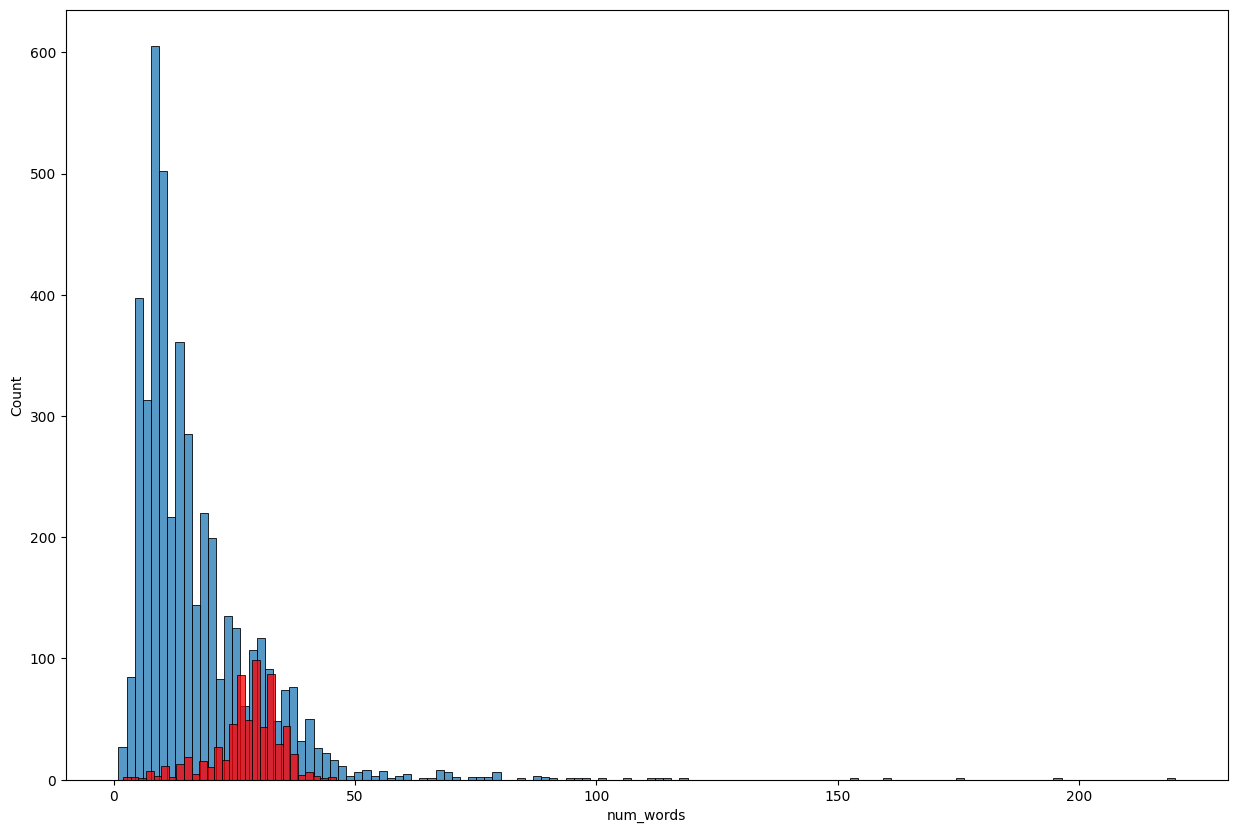

In [27]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['Goal']==0]['num_words'])
sns.histplot(df[df['Goal']==1]['num_words'],color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

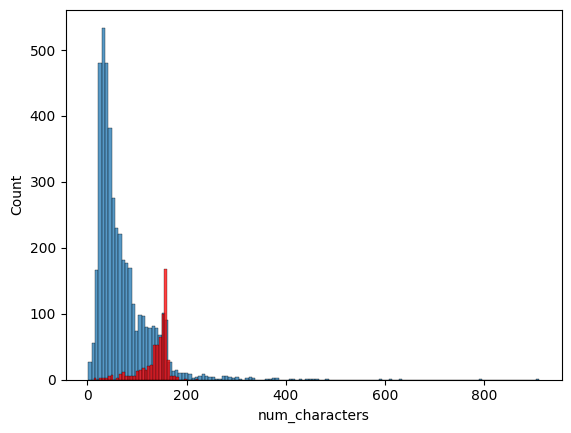

In [28]:
sns.histplot(df[df['Goal']==0]['num_characters'])
sns.histplot(df[df['Goal']==1]['num_characters'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

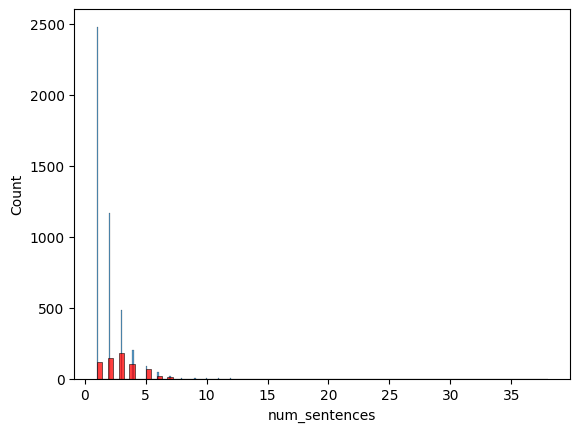

In [29]:
sns.histplot(df[df['Goal']==0]['num_sentences'])
sns.histplot(df[df['Goal']==1]['num_sentences'],color='red')

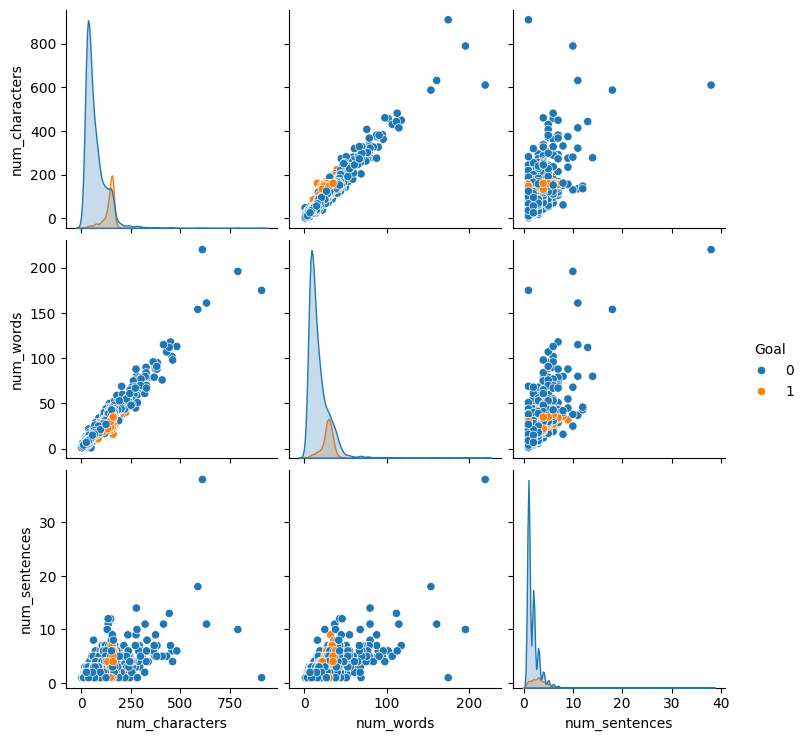

In [30]:
sns.pairplot(df,hue='Goal')

<Axes: >

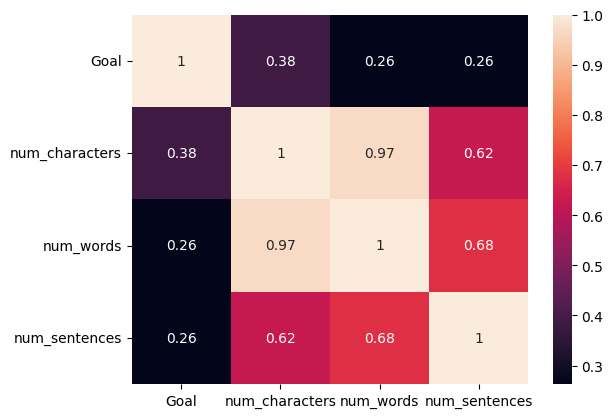

In [31]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

Data Perprocessing


In [32]:


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # Instantiate PorterStemmer here before using it
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [33]:
transform_text('Is that seriously how you spell his name?')

'serious spell name'

In [34]:
df['content'][20]

'Is that seriously how you spell his name?'

In [35]:
transform_text('I am a Krish Bhagat')

'krish bhagat'

In [36]:
df ['transform_text']=df['content']=df['content'].apply(transform_text)

In [37]:
df.head()

,Goal,content,num_characters,num_words,num_sentences,transform_text
0,0,go jurong point crazi avail bugi n great world...,111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni,29,8,2,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say,49,13,1,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though,61,15,1,nah think goe usf live around though


In [38]:
from wordcloud import WordCloud
wc=WordCloud(width=400,height=500,min_font_size=10,background_color='black')

In [39]:
spam_wc=wc.generate(df[df['Goal']==1]['transform_text'].str.cat(sep=" "))

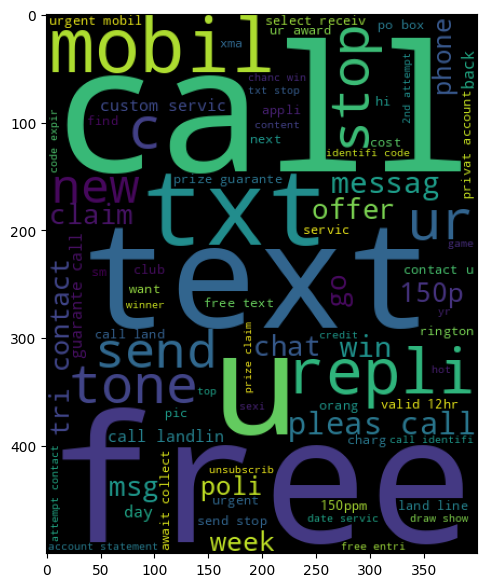

In [40]:
plt.figure(figsize=(17,7))
plt.imshow(spam_wc)

In [41]:
spam_wc=wc.generate(df[df['Goal']==0]['transform_text'].str.cat(sep=" "))

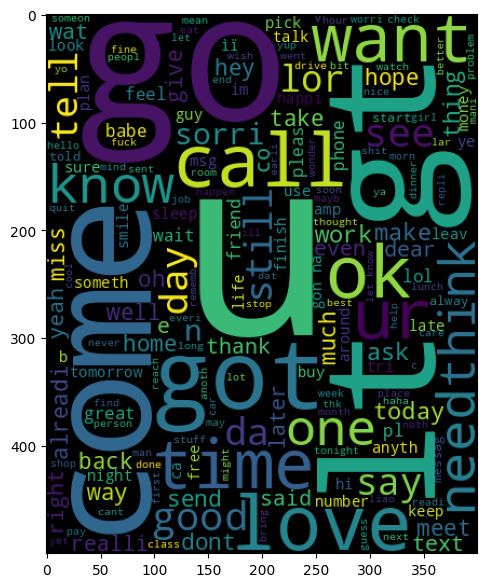

In [42]:
plt.figure(figsize=(17,7))
plt.imshow(spam_wc)

In [43]:
spam_corpus=[]
for msg in df[df['Goal']==1]['transform_text'].tolist():
   for word in msg.split():
     spam_corpus.append(word)
spam_wc.generate(" ".join(spam_corpus))

In [44]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [45]:
len (spam_corpus)

9939

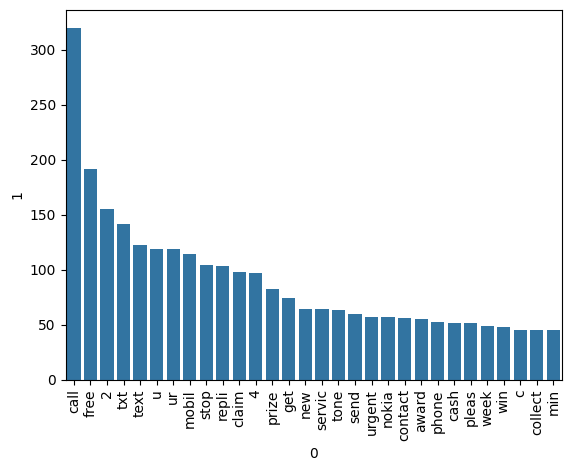

In [46]:
from collections import Counter # import the Counter object from the collections module
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=spam_df[0], y=spam_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
from wordcloud import WordCloud
ham_corpus = []
for msg in df[df['Goal']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
ham_wc = WordCloud()
ham_wc.generate(" ".join(ham_corpus))

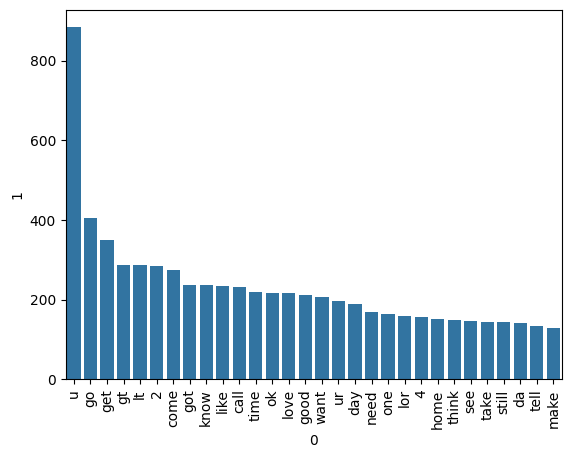

In [48]:
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=ham_df[0], y=ham_df[1])
plt.xticks(rotation='vertical')
plt.show()

MODEL BUDILING


In [49]:

X_train, X_test, y_train, y_test = train_test_split(df['transform_text'], df['Goal'], test_size=0.2, random_state=42)


In [50]:
tfidf = TfidfVectorizer(max_features=3000)

In [51]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [52]:
model = MultinomialNB()

In [53]:
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [54]:
y_pred = model.predict(X_test_tfidf)

In [55]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9680851063829787

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.78      0.87       145

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [56]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [57]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [58]:

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.
